In [1]:
#No mostrar los errores por actualización del python

import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

#CARGA DE LAS LIBRERIAS A UTILIZAR
import numpy as np
np.random.seed(10)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline
import scikitplot as skplt


from sklearn import datasets
from sklearn.feature_selection import RFE #Seleccion de variables
from sklearn.linear_model import LogisticRegression # mejor modelo para la selección de variables, modelo para calcular el p value

import pickle #Para guardar el modelo en un archivo

#SUBIR LA INFORMACIÓN OBTENIDA DEL FLUJO DE SAS
lme=pd.read_excel('C:/Users/maryvarg/Documents/Notas Jupyter/Modelo LME/BASE_p.xlsx')

lme.head()
lme.describe()



profundizacion_aprob1  profundizacion_aprob2  log_LME solicitado  \
count           35393.000000           35393.000000        35393.000000   
mean                0.533317               0.495347           20.493030   
std                 0.403366               0.406794            1.202453   
min                 0.000000               0.000000           15.607270   
25%                 0.051853               0.000000           19.583832   
50%                 0.570361               0.501417           20.582507   
75%                 1.000000               0.976598           21.286181   
max                 1.000000               1.000000           27.534824   

       log_cartera_vencida  log_cdt_banco_acum  log_ctas_compens_acum  \
count         35393.000000        35393.000000           35393.000000   
mean              0.886742            0.457092               0.665589   
std               3.177280            2.847567               3.397889   
min               0.000000            0.000000               0.000000   
25%               0.000000            0.000000               0.000000   
50%               0.000000            0.000000               0.000000   
75%               0.000000            0.000000               0.000000   
max              23.150412           24.253610              23.084867   

       log_cuenta_corriente  log_cuenta_de_ahorros  log_fondos_acum  \
count          35393.000000           35393.000000     35393.000000   
mean              13.478392               8.802563         4.515787   
std                7.051597               7.909546         7.428197   
min                0.000000               0.000000         0.000000   
25%               13.110291               0.000000         0.000000   
50%               16.580886              11.599103         0.000000   
75%               18.051398              16.188461        12.250090   
max               24.692683              24.233145        23.879079   

       log_otras_captaciones      ...       log_rlp_montoant        Region  \
count           35393.000000      ...           35393.000000  35393.000000   
mean                6.308390      ...              13.420183      3.425932   
std                 7.232494      ...               8.858634      1.941097   
min                 0.000000      ...               0.000000      1.000000   
25%                 0.000000      ...               0.000000      2.000000   
50%                 0.000000      ...              18.515991      3.000000   
75%                14.298554      ...              19.831668      6.000000   
max                23.676580      ...              24.439085      6.000000   

             Sector     utilanio1     utilanio2  log_LME_ACTUAL  \
count  35380.000000  35393.000000  35393.000000    35393.000000   
mean       4.308875      0.547368      0.374707       18.289699   
std        1.639114      0.497758      0.484054        6.276104   
min        1.000000      0.000000      0.000000        0.000000   
25%        3.000000      0.000000      0.000000       18.867033   
50%        4.000000      1.000000      0.000000       20.446901   
75%        5.000000      1.000000      1.000000       21.267797   
max       11.000000      1.000000      1.000000       28.023919   

       log_vtas_anio  log_lme_sol_act          Zona       Var_obj  
count   35393.000000     35393.000000  35393.000000  35393.000000  
mean       21.572379         3.207901     28.986692      0.349080  
std         2.581788         7.295535     23.849427      0.476686  
min         0.000000         0.000000      0.000000      0.000000  
25%        20.646683         0.000000     11.000000      0.000000  
50%        21.839299         0.000000     23.000000      0.000000  
75%        22.850683         0.000000     32.000000      1.000000  
max        29.893606        25.138643     74.000000      1.000000  

[8 rows x 25 columns]

In [2]:
#Identificar si hay valores perdidos
Count_perdidos= lme.isnull().sum()
Count_perdidos

radicado                    0
profundizacion_aprob1       0
profundizacion_aprob2       0
log_LME solicitado          0
log_cartera_vencida         0
log_cdt_banco_acum          0
log_ctas_compens_acum       0
log_cuenta_corriente        0
log_cuenta_de_ahorros       0
log_fondos_acum             0
log_otras_captaciones       0
log_total_captaciones       0
log_total_patrimonio        0
log_gestion_comercial       0
log_sva                     0
log_ope_montoant            0
log_rlp_montoant            0
Finalidad                   0
Finalidad2                  0
flujo_actual                0
Region                      0
SEGMENTO                    0
Sector                     13
cal_externa              7008
cal_interna               213
utilanio1                   0
utilanio2                   0
log_LME_ACTUAL              0
log_vtas_anio               0
gerenciado                  0
desc_subseg               186
log_lme_sol_act             0
Zona                        0
Var_obj   

In [3]:
#Imputar los valores perdidos e imputar las variables categoricas
#Los perdidos de cal_externa reemplazar con  F 
cext = lme["cal_externa"]
cext
cext[pd.isnull(cext)] = 'F'

T_cext,label = pd.factorize(lme.cal_externa)
T_cext

lme['T_cext']=T_cext


#Los perdidos de cal_interna reemplazar con  R12
cint = lme["cal_interna"]
cint
cint[pd.isnull(cint)] = 'R12'
T_cint,label = pd.factorize(lme.cal_interna)
T_cint

lme['T_cint']=T_cint


#Los perdidos de Sector reemplazar con  12
sec= lme["Sector"]
sec
sec[pd.isnull(sec)] = '12'
T_sec,label = pd.factorize(lme.Sector)
T_sec

lme['T_sec']=T_sec


#Los perdidos de Subsegmentos reemplazar con  'Sin informacion'
sub= lme["desc_subseg"]
sub
sub[pd.isnull(sub)] = 'Sin informacion'
T_sub,label = pd.factorize(lme.desc_subseg)
T_sub

lme['T_sub']=T_sub


#Validar que no queden valores perdidos
Count_perdidos= lme.isnull().sum()
Count_perdidos

radicado                 0
profundizacion_aprob1    0
profundizacion_aprob2    0
log_LME solicitado       0
log_cartera_vencida      0
log_cdt_banco_acum       0
log_ctas_compens_acum    0
log_cuenta_corriente     0
log_cuenta_de_ahorros    0
log_fondos_acum          0
log_otras_captaciones    0
log_total_captaciones    0
log_total_patrimonio     0
log_gestion_comercial    0
log_sva                  0
log_ope_montoant         0
log_rlp_montoant         0
Finalidad                0
Finalidad2               0
flujo_actual             0
Region                   0
SEGMENTO                 0
Sector                   0
cal_externa              0
cal_interna              0
utilanio1                0
utilanio2                0
log_LME_ACTUAL           0
log_vtas_anio            0
gerenciado               0
desc_subseg              0
log_lme_sol_act          0
Zona                     0
Var_obj                  0
T_cext                   0
T_cint                   0
T_sec                    0
T

In [4]:
#factorizar las variables categoricas que no tenian valores perdidos

T_fin,label = pd.factorize(lme.Finalidad2)
T_fin
lme['T_fin']=T_fin



T_Reg,label = pd.factorize(lme.Region)
T_Reg
lme['T_Reg']=T_Reg

T_ger,label = pd.factorize(lme.gerenciado)
T_ger
lme['T_ger']=T_ger

lme.head()

T_Seg,label = pd.factorize(lme.SEGMENTO)
T_Seg
lme['T_Seg']=T_Seg

T_flu,label = pd.factorize(lme.flujo_actual)
T_flu
lme['T_flujo']=T_flu

lme.head()
T=lme.iloc[:,34:43]
T.head()


T_cext  T_cint  T_sec  T_sub  T_fin  T_Reg  T_ger  T_Seg  T_flujo
0       0       0      0      0      0      0      0      0        0
1       0       1      0      0      0      0      0      0        0
2       1       1      1      1      0      1      0      0        0
3       0       0      0      0      0      0      1      0        0
4       0       1      0      2      0      2      0      0        0

In [5]:
#Construir la base con las variables numericas y las variables factorizadas

Xlme1=lme.iloc[:,1:17] # OK
Xlme1.head()
Xlme2=lme.iloc[:,25:29] # OK utilanio1, 2 log lme actual log vtas anio
Xlme2.head()
Xlme3=lme.iloc[:,31:33] # OK log_leme_sol_act  Y ZONA
Xlme4=lme.iloc[:,34:42] #OK se excluye 42 donde esta flujo

Xlme4.head()
Xlme= pd.concat([Xlme1, Xlme2,Xlme3,Xlme4],axis=1,)
Xlme.head()


t=Xlme.iloc[:,14:42]
t.head()



log_ope_montoant  log_rlp_montoant  utilanio1  utilanio2  log_LME_ACTUAL  \
0               0.0         17.909855          1          0       20.732835   
1               0.0         19.113828          0          0       20.210279   
2               0.0         20.366591          0          0       21.824029   
3               0.0         19.113828          0          0       21.800406   
4               0.0         14.508658          0          0       21.250211   

   log_vtas_anio  log_lme_sol_act  Zona  T_cext  T_cint  T_sec  T_sub  T_fin  \
0      20.411206              0.0    23       0       0      0      0      0   
1      21.119648              0.0    23       0       1      0      0      0   
2      22.387815              0.0    73       1       1      1      1      0   
3      21.810801              0.0    23       0       0      0      0      0   
4      20.558479              0.0     3       0       1      0      2      0   

   T_Reg  T_ger  T_Seg  
0      0      0      0  
1      0      0      0  
2      1      0      0  
3      0      1      0  
4      2      0      0

In [6]:
#Base con la variable objetivo
ylme=lme.Var_obj
ylme.head()


0    0
1    0
2    0
3    0
4    1
Name: Var_obj, dtype: int64

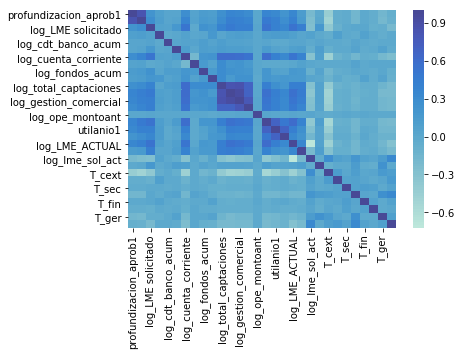

In [7]:
 # matriz de correlaciones 
sns.heatmap(Xlme.corr(),center=2) 

In [8]:
#Utilizar la regregisión logistica para selección de variables
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()

rfe = RFE(model,) # cuantas variables se quieren elegir
rfe = rfe.fit(Xlme, ylme)


# summarize the selection of the attributes
df = pd.DataFrame(Xlme, index=[0,1], columns=Xlme.columns)
df.iloc[0,:]=rfe.support_ 
df.iloc[1,:]=rfe.ranking_ 

df.head()


profundizacion_aprob1 profundizacion_aprob2 log_LME solicitado  \
0                  True                  True               True   
1                     1                     1                  1   

  log_cartera_vencida log_cdt_banco_acum log_ctas_compens_acum  \
0               False              False                 False   
1                  10                  8                     4   

  log_cuenta_corriente log_cuenta_de_ahorros log_fondos_acum  \
0                 True                 False           False   
1                    1                    16               3   

  log_otras_captaciones  ...   log_lme_sol_act   Zona T_cext T_cint  T_sec  \
0                 False  ...             False  False  False  False  False   
1                    13  ...                14     15      6     11      2   

  T_sub T_fin T_Reg T_ger  T_Seg  
0  True  True  True  True  False  
1     1     1     1     1      5  

[2 rows x 30 columns]

In [9]:
#Automaticamente toma las variables seleccionadas en el punto anterior y crea la base para entrenar
Sel_Camp = {'Campos': list(df),

        'Seleccion': list(rfe.ranking_)

        }

 

df_campos = pd.DataFrame(Sel_Camp,columns= ['Campos', 'Seleccion'])

df_campos_sel=df_campos[df_campos["Seleccion"]==1]

campos=list(pd.unique(df_campos_sel.Campos))

Xs=pd.DataFrame(Xlme,columns=campos)
Xs.head()

campos


['profundizacion_aprob1',
 'profundizacion_aprob2',
 'log_LME solicitado',
 'log_cuenta_corriente',
 'log_total_captaciones',
 'log_total_patrimonio',
 'log_gestion_comercial',
 'log_rlp_montoant',
 'utilanio1',
 'utilanio2',
 'log_vtas_anio',
 'T_sub',
 'T_fin',
 'T_Reg',
 'T_ger']

In [10]:
#Dividir la base en dos, para entrenamiento y de validación (70/30)
X_train, X_test, y_train, y_test = train_test_split(Xs, ylme, test_size=0.3)

In [11]:
#Entrenar el modelo 
from sklearn.model_selection import GridSearchCV
param_test1 = {'n_estimators':range(20,81,10)}

gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
bestgb=gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_


param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}


gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=gsearch1.best_params_.get('n_estimators'), max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
bestgb2=gsearch2.fit(X_train,y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

param_test3 = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(20,71,10)}


gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=gsearch1.best_params_.get('n_estimators'),max_depth=gsearch2.best_params_.get('max_depth'),max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
bestgb3=gsearch3.fit(X_train,y_train)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

param_test4 = {'max_features':range(3,15,2)}

gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=gsearch1.best_params_.get('n_estimators'),max_depth=gsearch2.best_params_.get('max_depth'), min_samples_split=gsearch3.best_params_.get('min_samples_split')
, min_samples_leaf=gsearch3.best_params_.get('min_samples_leaf'), subsample=0.8, random_state=10),
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
bestgb4=gsearch4.fit(X_train,y_train)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_


param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9,1]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,  n_estimators=gsearch1.best_params_.get('n_estimators'),max_depth=gsearch2.best_params_.get('max_depth'), min_samples_split=gsearch3.best_params_.get('min_samples_split')
, min_samples_leaf=gsearch3.best_params_.get('min_samples_leaf'), subsample=0.9, random_state=10,max_features=gsearch4.best_params_.get('max_features')),
param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)                        
bestgb5=gsearch5.fit(X_train,y_train)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_  

bestgb5.best_estimator_.get_params()

C:\Users\maryvarg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\Users\maryvarg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\Users\maryvarg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\Users\maryvarg\AppData\Local

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 9,
 'max_features': 3,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 30,
 'min_samples_split': 1000,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'presort': 'auto',
 'random_state': 10,
 'subsample': 0.8,
 'verbose': 0,
 'warm_start': False}

In [12]:
#Guardar el modelo entrenado en un archivo en la ruta de Python
filename = 'finalized_model.sav.sav'
pickle.dump(bestgb5, open(filename, 'wb'))


In [13]:
#Cargar el modelo, construir la base para la validación partiendo de X_test
loaded_model = pickle.load(open('finalized_model.sav', 'rb'))
XS=pd.DataFrame(X_test,columns=campos)
#Obtener las Y_pred partiendo de la X_test =XS

y_pred_bestgb5=loaded_model.predict(XS)
bestgb5_probas=loaded_model.predict_proba(XS)
XS['bestgb5_probas']=bestgb5_probas[:,1]
XS['y_pred_bestgb5']=y_pred_bestgb5

C:\Users\maryvarg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


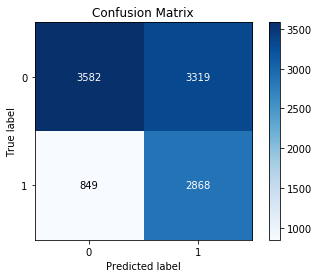

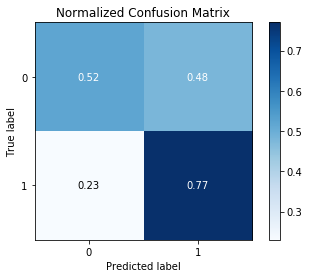

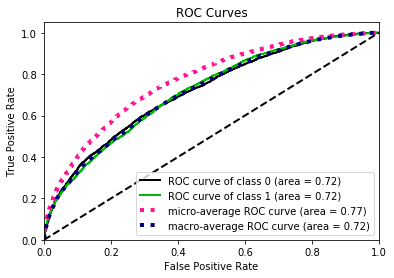

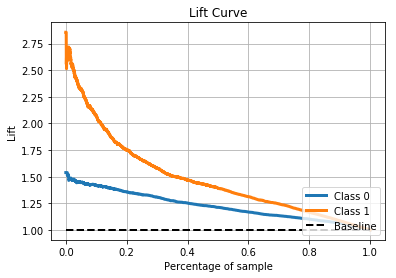

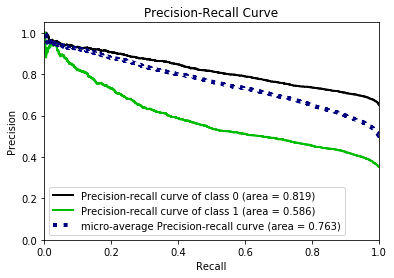

0.7155327213731915

In [14]:
#Calcular la nueva Y_predic con corte cuando la probabilidad de utilización del modelo
#es de 30% y no de 50% que es el default

cutoff=.3
XS.loc[XS['bestgb5_probas']>=cutoff,'Predict']=1
XS.loc[XS['bestgb5_probas']<cutoff,'Predict']=0

#Dibujar la matriz de confusión, normalizada y la curva ROC
skplt.metrics.plot_confusion_matrix(y_test, XS.Predict)
skplt.metrics.plot_confusion_matrix(y_test, XS.Predict,normalize=True)

skplt.metrics.plot_roc(y_test, bestgb5_probas)
skplt.metrics.plot_lift_curve(y_test,bestgb5_probas)
skplt.metrics.plot_precision_recall_curve(y_test, bestgb5_probas)
plt.show()

#Score del modelo aplicando las bases de validación
XS.head()
score_bestgb5= bestgb5.score(X_test, y_test)
score_bestgb5

In [15]:
#Exportar la validacion a excel
A=XS
A.head()
A['y_pred_bestgb5']=y_pred_bestgb5
A.head()
A['bestgb5_probas']=bestgb5_probas
A.head()
A['Var_obj']=y_test
sc2=A
sc3=sc2.sort_values(by=['y_pred_bestgb5','bestgb5_probas'], ascending=[False,False] )
sc3.to_excel('Validacion.xlsx', sheet_name='Validacion')  # exportar a excel